## Experiment-4

In the experiment-4, Random forest model is compared with Logistic Regression Model

In [1]:
import pandas as pd
import numpy as np
import os
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
dataset=pd.read_csv('Research_Article_train.csv')
#dataset.head(15)

dataset.head(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,1 .what Reconstructing Subject-Specific Effect...,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [3]:
dataset['ID']=dataset['ID'].astype(float)
dataset['Computer Science']=dataset['Computer Science'].astype(float)
dataset['Physics']=dataset['Physics'].astype(float)
dataset['Mathematics']=dataset['Mathematics'].astype(float)
dataset['Statistics']=dataset['Statistics'].astype(float)
dataset['Quantitative Biology']=dataset['Quantitative Biology'].astype(float)
dataset['Quantitative Finance']=dataset['Quantitative Finance'].astype(float)
dataset.dtypes

ID                      float64
TITLE                    object
ABSTRACT                 object
Computer Science        float64
Physics                 float64
Mathematics             float64
Statistics              float64
Quantitative Biology    float64
Quantitative Finance    float64
dtype: object

In [4]:
y=dataset[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

In [11]:
#combining 2 text columns title and abstract into one and drop columns title and abstract
dataset['Text']=dataset['TITLE']+' '+dataset['ABSTRACT']
dataset.drop(columns=['TITLE','ABSTRACT'], inplace=True)
#dataset.head(5)

### Data Preprocessing

In [5]:
remove_punc = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', remove_punc))

In [6]:
stopword = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopword])

In [7]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [9]:
def preprocessing(dataset):
    #convert to string type
    dataset['Text'] = dataset['Text'].astype(str)
    #convert to the lowercase
    dataset["Text"] = dataset["Text"].str.lower()
    #remove punctuations
    dataset["Text"] = dataset["Text"].apply(lambda text: remove_punctuation(text))
    #stopwords removal
    dataset["Text"] = dataset["Text"].apply(lambda text: remove_stopwords(text))
    #Remove Numbers
    dataset['Text'] =dataset["Text"].str.replace('\d+', '')
    #stemming
    dataset["Text"] = dataset["Text"].apply(lambda text: stem_words(text))
    #lemmatisation
    dataset["Text"] = dataset["Text"].apply(lambda text: lemmatize_words(text))
    return dataset

In [12]:
import warnings
warnings.filterwarnings('ignore')
processed_data=preprocessing(dataset)

In [13]:
clean_data=processed_data[['Text','Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']]
clean_data.head(5)

,Text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,reconstruct subjectspecif effect map predict m...,1.0,0.0,0.0,0.0,0.0,0.0
1,rotat invari neural network rotat invari trans...,1.0,0.0,0.0,0.0,0.0,0.0
2,spheric polyharmon poisson kernel polyharmon f...,0.0,0.0,1.0,0.0,0.0,0.0
3,finit element approxim stochast maxwelllandaul...,0.0,0.0,1.0,0.0,0.0,0.0
4,compar studi discret wavelet transform wavelet...,1.0,0.0,0.0,1.0,0.0,0.0


#### Text Featurisation

In [14]:
tfidf=TfidfVectorizer(analyzer='word',max_features=10000,min_df=5, max_df=0.9, token_pattern = '(\S+)', ngram_range=(1, 2))
X=tfidf.fit_transform(clean_data['Text'])
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Splitting Dataset

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

### Random Forest Classifier

#### Training the model

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
forest= RandomForestClassifier(n_estimators = 200)
model = forest.fit(X_train, y_train) 

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

##### Testing the model by making predictions

In [ ]:
y_pred= model.predict(X_test)
y_pred

In [19]:
from sklearn.metrics import accuracy_score
# View accuracy score
accuracy_score(y_test, y_pred)

0.5864123957091776

In [21]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test,y_pred))

[[[2083  368]
  [ 302 1442]]

 [[2958   41]
  [ 350  846]]

 [[3046   74]
  [ 362  713]]

 [[3061  108]
  [ 576  450]]

 [[4079    0]
  [ 116    0]]

 [[4145    0]
  [  50    0]]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1744
           1       0.95      0.71      0.81      1196
           2       0.91      0.66      0.77      1075
           3       0.81      0.44      0.57      1026
           4       0.00      0.00      0.00       116
           5       0.00      0.00      0.00        50

   micro avg       0.85      0.66      0.75      5207
   macro avg       0.58      0.44      0.49      5207
weighted avg       0.83      0.66      0.73      5207
 samples avg       0.74      0.70      0.71      5207



## Logistic Regression

Logistic Regression is a simplest supervised learning algorithm, it is used to modelling categorical outcome variable. ie if the dependent variables are binary, this algorithm is used for predictions. Here the model is testing the text is related the given labels('Computer Science', 'Physics', 'Mathematics','Statistics', 'Quantitative Biology', 'Quantitative Finance') or not.

###### Training the model

In [24]:
# logistic regression for multi-label classification using a one-vs-rest
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)


##### Testing the model

In [25]:
# make predictions
yhat = ovr.predict(X_test)
yhat

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [26]:
from sklearn.metrics import accuracy_score
# View accuracy score
accuracy_score(y_test, yhat)

0.6471990464839095

Here, the accuracy of Logistic Regression is higher than the accuracy of random forest. The accuracy is increased from 0.58 to 0.64

In [27]:
print(multilabel_confusion_matrix(y_test,yhat))

[[[2185  266]
  [ 280 1464]]

 [[2929   70]
  [ 224  972]]

 [[2961  159]
  [ 252  823]]

 [[2993  176]
  [ 325  701]]

 [[4073    6]
  [ 111    5]]

 [[4142    3]
  [  45    5]]]


#### Plotting Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

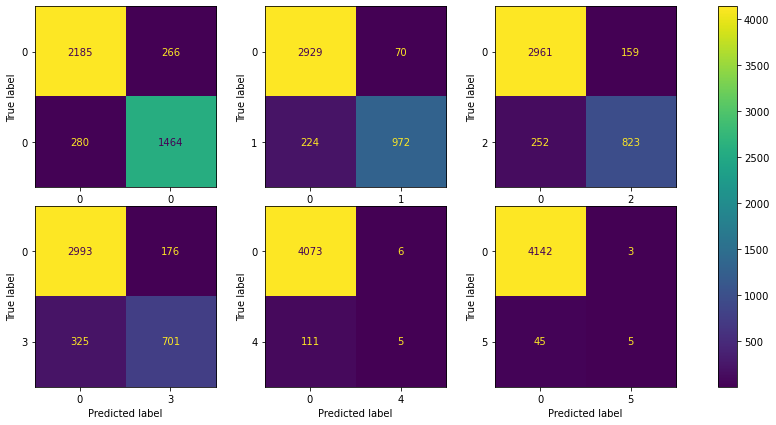

In [33]:
ytest=y_test.values 
f, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(ytest[:, i],yhat[:, i]),display_labels=[0, i])
                                  
    disp.plot(ax=axes[i], values_format='.4g')
    #disp.ax_.set_title(f'label')
    #if i<10:
        #disp.ax_.set_xlabel('')
    #if i%5!=0:
        #disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [34]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1744
           1       0.93      0.81      0.87      1196
           2       0.84      0.77      0.80      1075
           3       0.80      0.68      0.74      1026
           4       0.45      0.04      0.08       116
           5       0.62      0.10      0.17        50

   micro avg       0.85      0.76      0.81      5207
   macro avg       0.75      0.54      0.58      5207
weighted avg       0.84      0.76      0.80      5207
 samples avg       0.81      0.80      0.79      5207



###### Discuss best results

The perfect model is the one which has accuracy 100% and f1-score is equal to 1. f1-score is the mean of precision and recall values, it used for measuring the accuracy.

From the experiments that has done above, it is evident that the accuracy is slightly improved, the experiment 4 shows the best results in accuracy as well as in the f1-score.The f1-score of micro avg, weighted avg are 0.81 and 0.80. The logistic regression with one vs rest classifier algorithm is used to analyse the model and the final accuracy is 0.64. From the classification chart, it can understand that the f1-score for each class is different especially the class 4 and class 5, this is because the text column labeled to these classes very less. Except these 2 classes all other f1-scores are better compared to previous setup.

###### Evaluate the overall attempt and outcome

In the experiment 1, the dataset is preprocessed using different methods like remove punctuation,remove stopwords, converting the text from uppercase to lowercase, stemming, lemmatization and analyse the model without lemmatization method and with lemmatization method.There  has a minute variation in the accuracy of the model.
In the experiment 2, the text featurisation methods tfidf and countVectorizer is compared, both the model are used to convert text to vector representation.The accuracy of the model with countVectorizer is 0.568 and the model with tfidf is 0.589. ie tfidf is better than countVectorizer
In the experiment 3, hyperparameter tuning is done for improving the accuracy of the model and the accuracy is improved after tuning the model by 0.001%
In the experiment 4, in which two models are compared and the logistic regression model gives the best results than random forest.It is possible to increase the accuracy of the model by hyperparameter tuning.

The above experiment has done and analysed the model based on the dataset available on the kaggle. In this dataset most of the text have only 1 label and it is shown in the bar chart plotted. It may cause class imbalance and also it affects the accuracy of the model. We can balance the data by using techniques like MLSMOTE for improving the accuracy. Also need to build the model using different algorithms to increase the accuracy.

### Conclusion

Multilabel classifier model has built by tried out 4 different experimentation setup, and then train and test the model to understand the variations.